# **Predictive Analysis: Milk Quality dataset**

https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data

# **1. Import Library**

Pada tahap ini, kita perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np        # operasi numerik
import pandas as pd       # manipulasi data

import matplotlib.pyplot as plt   # visualisasi grafik
import seaborn as sns             # visualisasi statistik

from sklearn.model_selection import train_test_split, GridSearchCV              # split data & tuning model
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder   # pra-pemrosesan data
from sklearn.compose import ColumnTransformer         # transformasi kolom
from sklearn.pipeline import Pipeline                 # pipeline ML

from sklearn.ensemble import RandomForestClassifier   # model random forest
from sklearn.svm import SVC                           # model SVM

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score   # evaluasi model

import warnings
warnings.filterwarnings('ignore') # menghilangkan warning

In [2]:
# menggunakan gaya visualisasi five thirtyeheight
plt.style.use('fivethirtyeight')

# mengatur gaya seaborn dengan latar grid putih
sns.set(style='whitegrid')

# **2. Data Understanding**

In [3]:
# membaca data dari file csv ke dalam DataFrame
df = pd.read_csv('milknew.csv')

# menampilkan 5 baris pertama
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


**Keterangan**

- **pH         :** Tingkat keasaman susu
- **Temprature :** Suhu susu saat pengukuran
- **Taste      :** Indikator rasa  (0 = tidak enak, 1 = enak)
- **Odor       :** Indikator bau (0 = bau tidak sedap, 1 = normal)
- **Fat        :** Kandungan lemak (0 = rendah, 1 = tinggi)
- **Turbidity  :** Kekeruhan (0 = rendah, 1 = tinggi)
- **Colour     :** Nilai intensitas warna susu
- **Grade      :** Kualitas susu (low, medium, high)

In [4]:
# menampilkan jumlah baris dan kolom dalam DataFrame
df.shape

(1059, 8)

Dataset memiliki 1059 baris dan 8 kolom.

In [5]:
# menampilkan informasi ringkas tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


Semua kolom memiliki data lengkap (tidak ada missing values).

In [6]:
# menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Keterangan

- **count :** Jumlah data (1059 untuk semua kolom)
- **mean  :** Rata-rata (contoh: pH ~6.63, Temperatur ~44.2°C)
- **std   :** Simpangan baku (variabilitas data)
- **min   :** Nilai minimum (misal pH = 3.0)
- **25%   :** Kuartil pertama (batas 25% data terbawah)
- **50%   :** Median (kuartil kedua / tengah)
- **75%   :** Kuartil ketiga (batas 25% data teratas)
- **max   :** Nilai maksimum

In [7]:
# mengecek jumlah nilai kosong di setiap kolom
df.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


 Tidak ada nilai kosong di seluruh kolom dataset.

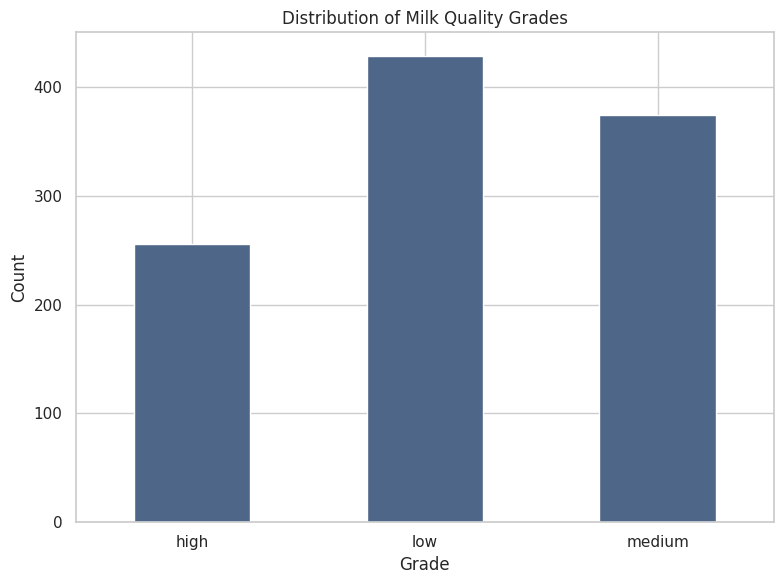

In [15]:
# membuat plot distribusi kelas susu
plt.figure(figsize=(8, 6))
grade_count = df['Grade'].value_counts().sort_index()   # menghitung dan mengurutukan jumlah data per kelas
grade_count.plot(kind='bar', color='#4E6688')

plt.title('Distribution of Milk Quality Grades')  # judul grafik
plt.xlabel('Grade')  # label sumbu x
plt.ylabel('Count')                               # label sumbu y
plt.xticks(rotation=0)
plt.tight_layout()

# menampilkan grafik
plt.show()

**Keterangan**

- Low berjumlah 429 sampel, menjadi kelas dengan jumlah data terbanyak.

- Medium berjumlah 374 sampel.

- High berjumlah 256 sampel, menjadi kelas dengan jumlah data paling sedikit.

# **3. Exploratory Data Analysis (EDA)**

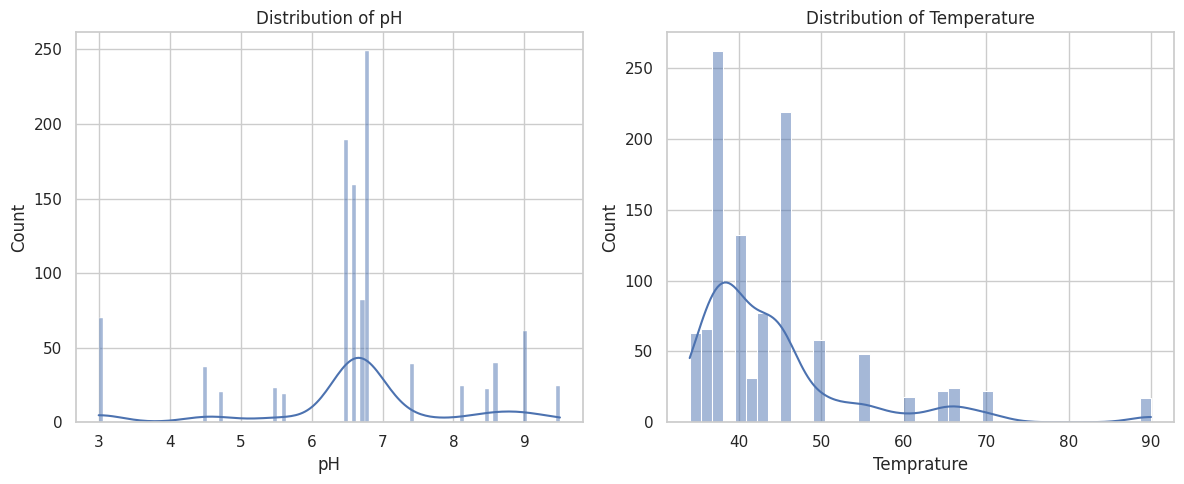

In [9]:
# membuat grafik distribusi pH dan Temperature
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['pH'], kde=True)  # plot histogram distribusi pH dengan kurva KDE
plt.title('Distribution of pH')

plt.subplot(1, 2, 2)
sns.histplot(df['Temprature'], kde=True)  #  plot histogram distribusi Temperatur dengan kurva KDE
plt.title('Distribution of Temperature')

plt.tight_layout()
plt.show()          # menampilkan grafik

**Keterangan**

Gambar Kiri (Distribusi pH)

- Mayoritas sampel memiliki nilai pH antara 6-7, menunjukkan susu dalam kondisi normal.
- Nilai di luar rentang tersebut menunjukkan potensi susu asam atau terkontaminasi.

Gambar Kanan (Distribusi Temperature)

- Sebagian besar sampel berada pada suhu 35-45°C, mencerminkan suhu standar penyimpanan atau pengolahan susu.
- Nilai di atas 50°C menunjukkan kemungkinan pasteurisasi atau pemanasan.

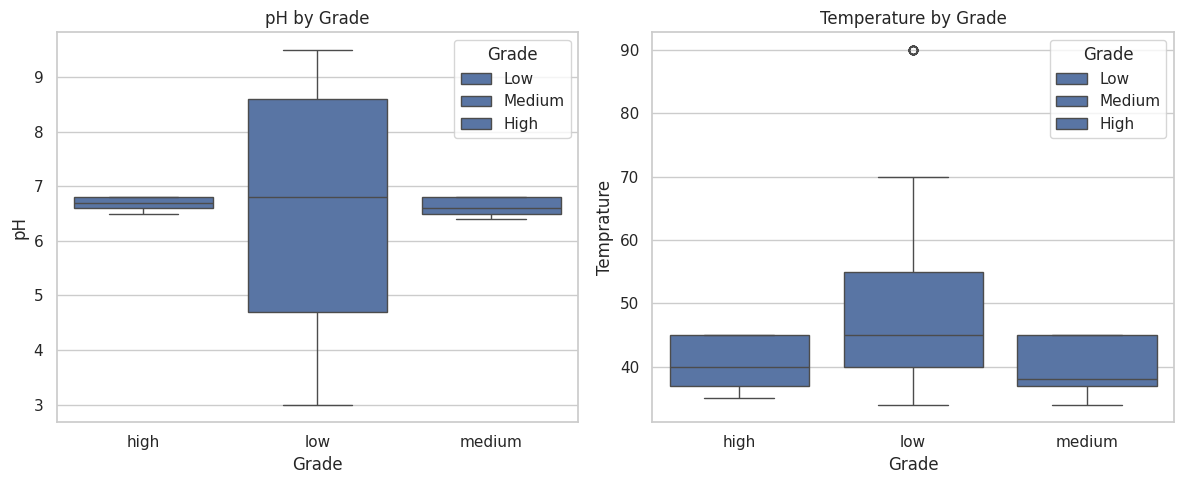

In [13]:
# membuat grafik distribusi pH dan Temperature terhadap kategori Grade
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Grade', y='pH', data=df)
plt.title('pH by Grade')
plt.legend(title='Grade', labels=['Low', 'Medium', 'High'])

plt.subplot(1, 2, 2)
sns.boxplot(x='Grade', y='Temprature', data=df)
plt.title('Temperature by Grade')
plt.legend(title='Grade', labels=['Low', 'Medium', 'High'])

plt.tight_layout()
plt.show()

**Keterangan**

Gambar Kiri (pH by Grade):
- Grade Low memiliki variasi pH yang besar (3-9) dengan median sekitar 6.5.
- Grade Medium dan High memiliki pH yang lebih stabil di kisaran 6-7.

Gambar Kanan (Temperature by Grade):
- Grade Low menunjukkan variasi temperatur yang besar (35-70°C) dengan outlier di 90°C.
- Grade Medium dan High memiliki rentang temperatur lebih konsisten (35-45°C).

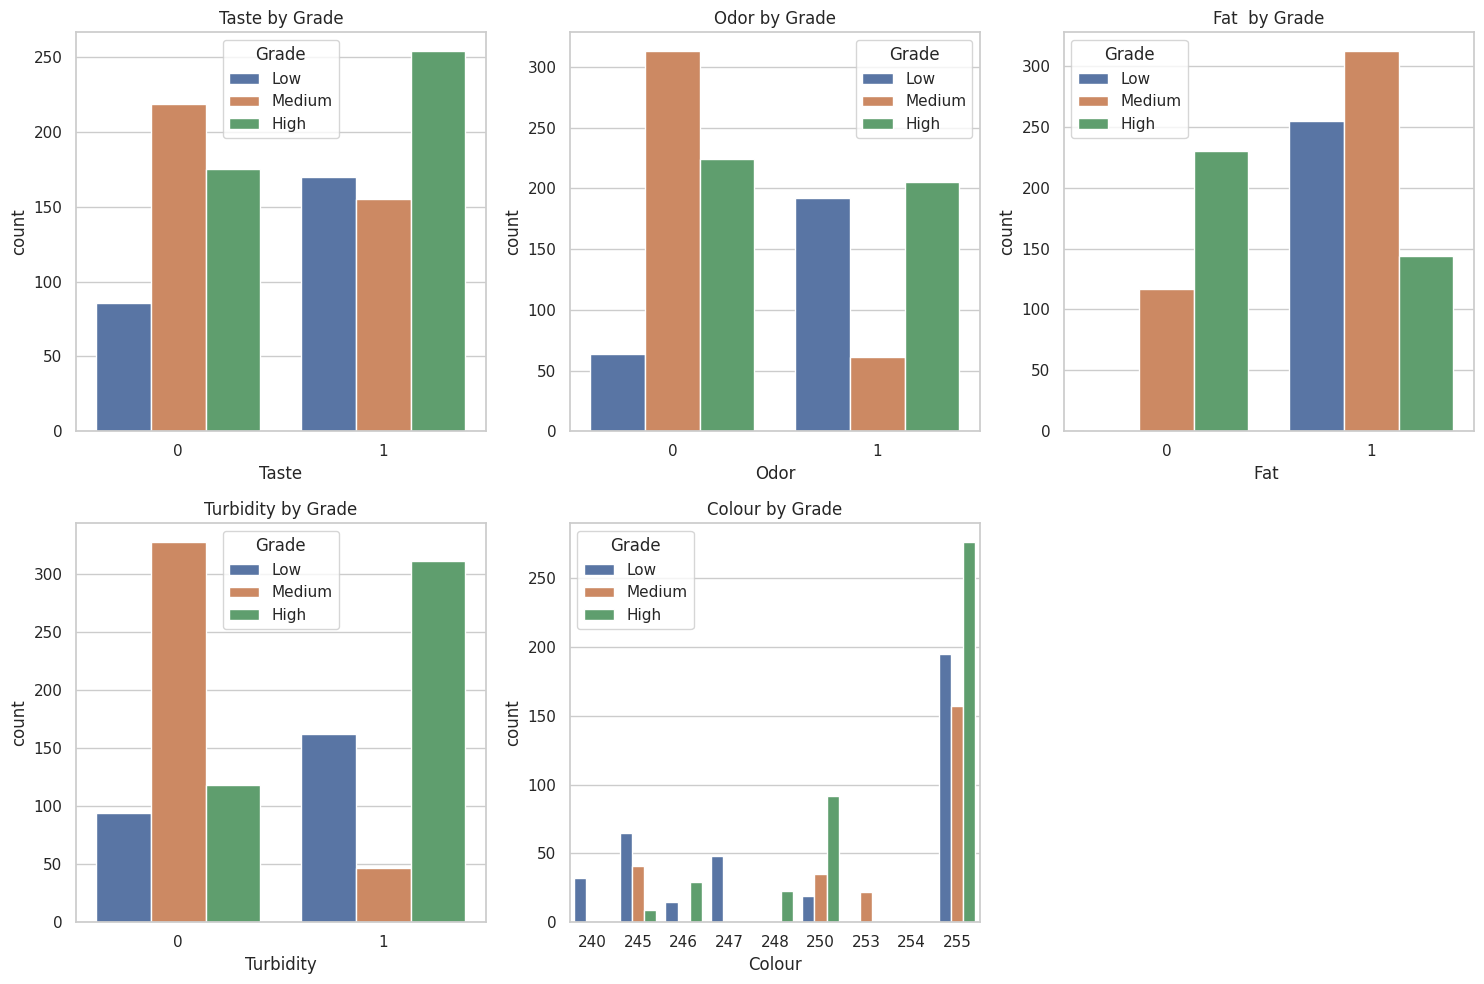

In [14]:
# menampilkan grafik semua parameter terhadap grade
categorical_features = ['Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, hue='Grade', data=df)
    plt.title(f'{feature} by Grade')
    plt.xticks(rotation=0)
    plt.legend(title='Grade', labels=['Low', 'Medium', 'High'])

plt.tight_layout()
plt.show()

**Keterangan**

Taste by Grade
- Taste 1 (enak) banyak ditemukan pada Grade (Low) dan Grade (High).
- Taste 0 (tidak enak) lebih banyak pada Grade (Medium).

Odor by Grade
- Odor 0 (bau tidak sedap) mendominasi Grade (Medium) dan Grade (Low).
- Odor 1 (normal) mendominasi Grade (High).

Fat by Grade
- Fat 0 (rendah) dominan di Grade (Medium).
- Fat 1 (tinggi) lebih banyak muncul pada Grade (Low) dan Grade (High).

Turbidity by Grade
- Turbidity 0 (rendah) banyak pada Grade (Medium).
- Turbidity 1 (tinggi) banyak pada Grade (Low) dan Grade (High).

Colour by Grade
- Colour 255 mendominasi semua grade, tapi Grade (Low) paling banyak.
- Nilai warna di bawah 255 cenderung meningkat untuk Grade (High).

# **4. Data Preparation**

In [16]:
grade_mapping = {'low': 0, 'medium': 1, 'high': 2}    # mapping label kategori ke angka
df['Grade'] = df['Grade'].map(grade_mapping)          # mengubah nilai kolom 'Grade' dari teks ke angka

In [17]:
print("\nGrade Distribution after conversion (0: low, 1: medium, 2: high):")

# menampilkan jumlah data per kelas setelah konversi
display(df['Grade'].value_counts())


Grade Distribution after conversion (0: low, 1: medium, 2: high):


,count
Grade,
0,429
1,374
2,256


In [18]:
# memisahkan fitur (x) dan label (y)
X = df.drop('Grade', axis=1)
y = df['Grade']

In [19]:
# menentukan kolom kategorikal dan numerik dari data fitur (x)
categorical_cols = [col for col in X.columns if X[col].dtype == 'object' or X[col].nunique() < 5]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# menampilkan hasil identifikasi kolom
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Categorical columns: ['Taste', 'Odor', 'Fat ', 'Turbidity']
Numerical columns: ['pH', 'Temprature', 'Colour']


In [20]:
# membuat pipeline untuk transformasi data numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# membuat pipeline untuk transformasi data kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
# menggabungkan pipeline numerik dan kategorikal le dalam satu preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [22]:
# membagi dataset menjadi data latih dan data uji dengan rasio 80:20
# menggunakan stratify agar distribusi kelas (Grade) tetap seimbang di kedua set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# menampilkan ukuran dataset pelatihan dan pengujian
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# menampilkan distribusi kelas (Grade) pada data latih
print(f"Training set grade distribution: \n{y_train.value_counts()}")

# menampilkan distribusi kelas (Grade) pada data uji
print(f"Testing set grade distribution: \n{y_test.value_counts()}")


Training set shape: (847, 7)
Testing set shape: (212, 7)
Training set grade distribution: 
Grade
0    343
1    299
2    205
Name: count, dtype: int64
Testing set grade distribution: 
Grade
0    86
1    75
2    51
Name: count, dtype: int64


# **5. Modeling**

In [23]:
# membuat pipeline untuk model RF
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# membuat pipeline untuk model SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))
])

In [24]:
# melatih model RF dengan data pelatihan
print("Training Random Forest baseline model...")
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# melatih model SVM dengan data pelatihan
print("Training SVM baseline model...")
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

Training Random Forest baseline model...
Training SVM baseline model...


# **6. Evaluation**

In [25]:
# menampilkan hasil evaluasi model Random Forest
print("\nRandom Forest Baseline Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# menampilkan hasil evaluasi model SVM
print("\nSVM Baseline Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Random Forest Baseline Results:
Accuracy: 0.9953
F1 Score (weighted): 0.9953

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       1.00      1.00      1.00        75
           2       0.98      1.00      0.99        51

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212


SVM Baseline Results:
Accuracy: 0.9292
F1 Score (weighted): 0.9292

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        86
           1       0.91      0.91      0.91        75
           2       0.88      0.88      0.88        51

    accuracy                           0.93       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.93      0.93      0.93       212



**Keterangan**

Random Forest
- Accuracy: 99.53% — sangat tinggi, artinya model ini sangat akurat dalam mengklasifikasikan kualitas susu.
- F1 Score (weighted): 99.53% — mengindikasikan keseimbangan sangat baik antara precision dan recall di semua kelas.

SVM
- Accuracy: 92.92% — juga cukup baik, namun lebih rendah dibanding Random Forest.
- F1 Score (weighted): 92.92% — performa yang baik tapi tidak setinggi Random Forest.

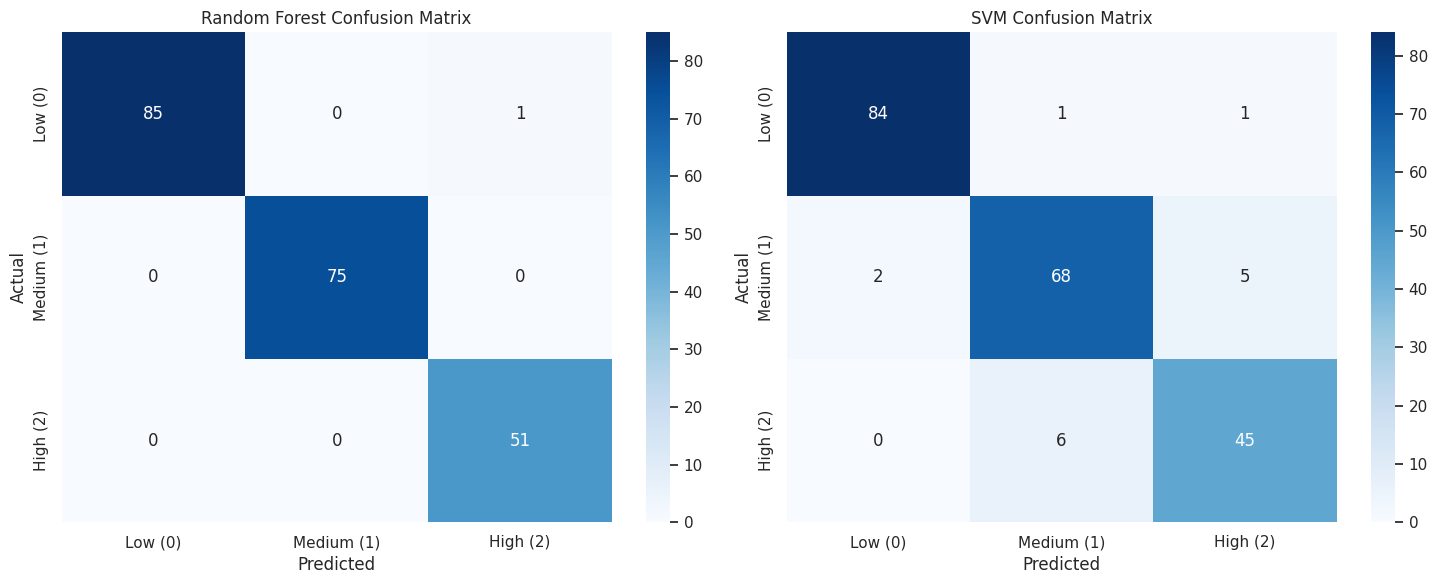

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# membuat confusion matrix untuk prediksi RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Random Forest Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_xticklabels(['Low (0)', 'Medium (1)', 'High (2)'])
ax1.set_yticklabels(['Low (0)', 'Medium (1)', 'High (2)'])

# membuat confusion matrix untuk prediksi SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('SVM Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xticklabels(['Low (0)', 'Medium (1)', 'High (2)'])
ax2.set_yticklabels(['Low (0)', 'Medium (1)', 'High (2)'])

plt.tight_layout()
plt.show()


Model Random Forest menunjukkan performa yang sangat baik
- Low (0): 85 sampel diklasifikasikan dengan benar, hanya 1 sampel salah sebagai High (2).
- Medium (1): Semua 75 sampel diklasifikasikan dengan benar tanpa kesalahan.
- High (2): Semua 51 sampel diklasifikasikan dengan benar tanpa kesalahan.

Tidak ada kesalahan signifikan, menunjukkan model ini sangat akurat.



---

Model SVM menunjukkan performa cukup baik, namun dengan beberapa kesalahan:
- Low (0): 84 sampel benar, 1 salah ke Medium (1), dan 1 salah ke High (2).
- Medium (1): 68 sampel benar, namun ada 2 salah ke Low (0) dan 5 salah ke High (2).
- High (2): 45 sampel benar, namun ada 6 salah ke Medium (1).

Kesalahan lebih sering terjadi pada kelas Medium (1).